
### Importing Packages for the Project

In [1]:
# Basic packages required for data manipulation and Feature Engineering

import pandas as pd
import numpy as np
# for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pylab as py

# statistical package for conducting hypothesis tests and other tasks 
import statsmodels.api as stm
from scipy.stats import chi2_contingency
from scipy.stats import norm

#package for model building
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 


In [2]:
#package for Feature Engeeniring/Categorical Data Transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [3]:
# to allow multiple outputs be visible in the same output cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from scipy import stats

### Reading the data ustilised for training the model

In [5]:
#df=pd.read_csv("D:/Sitanshu/Python/Twitter_Bot_Classification/finaldata.csv")
df=pd.read_csv("~/virtualenv/Twitter_Project/Twitter_Bot_Classification/finaldata.csv")
#df_1=pd.read_csv("D:/Sitanshu/Python/Twitter_Bot_Classification/model_data.csv")
df_1=pd.read_csv("~/virtualenv/Twitter_Project/Twitter_Bot_Classification/model_data.csv")
df_1 = df_1.drop('Unnamed: 0', axis =1)
df.drop(['Unnamed: 0', 'crawled_at', 'contributors_enabled','testset', 'random', 'default_profile_image', 'notifications', 'following', 'follow_request_sent', 'is_translator'], axis = 1, inplace = True)

#### Feature Creation

#### Modifying certain columns to use in the model

In [29]:
#if not using df_1 then uncomment

# manipulating target variable by putting 0 and 1 values
df.loc[df["Category"] == 'genuine', "class"] = "0"
df.loc[df["Category"] != 'genuine', "class"] = "1"
df['class'].value_counts()

df.loc[df["url"].isnull(), "url_present"] = "0"
df.loc[df["url"].notnull(), "url_present"] = "1"
df['url_present'].value_counts()
#fig_1 = sns.countplot(x = 'url_present', data = df, hue = 'class')

df.loc[df["default_profile"].isnull(), "default_profile"] = "0"
df['default_profile'].value_counts()
#fig_1 = sns.countplot(x = 'default_profile', data = df, hue = 'class')

df.loc[df["geo_enabled"].isnull(), "geo_enabled"] = "0"
df['geo_enabled'].value_counts()
#fig_1 = sns.countplot(x = 'geo_enabled', data = df, hue = 'class')

df.loc[df["profile_use_background_image"].isnull(), "profile_use_background_image"] = "0"
df['profile_use_background_image'].value_counts()
#fig_1 = sns.countplot(x = 'profile_use_background_image', data = df, hue = 'class')

df.loc[df["description"].isnull(), "description_present"] = "0"
df.loc[df["description"].notnull(), "description_present"] = "1"
df['description_present'].value_counts()


df.loc[df["verified"] != 1, "verified"] = "0"
df['verified'].value_counts()
df.loc[df["protected"] != 1, "protected"] = "0"
df['protected'].value_counts()
#fig_1 = sns.countplot(x = 'description_present', data = df, hue = 'class')


1    7543
0    3474
Name: class, dtype: int64

0    7509
1    3508
Name: url_present, dtype: int64

0      9540
1.0    1477
Name: default_profile, dtype: int64

0      7723
1.0    3294
Name: geo_enabled, dtype: int64

1.0    9503
0      1514
Name: profile_use_background_image, dtype: int64

1    6346
0    4671
Name: description_present, dtype: int64

0      11006
1.0       11
Name: verified, dtype: int64

0      10939
1.0       78
Name: protected, dtype: int64

##### Ignore warning should be implemented or not?

In [30]:
df_model = df[['screen_name','statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'url_present', 'default_profile', 'geo_enabled', 'profile_use_background_image','description_present', 'verified', 'protected', 'class']]
df_model['age'] = df_1['age']

<ipython-input-30-a572db4fd180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['age'] = df_1['age']


### Using EDA to understand data and create new Features

In [25]:
pd.options.display.float_format = '{:.5f}'.format
df_model.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,age
count,11017.00000,11017.00000,11017.00000,11017.00000,11017.00000,11017.00000
mean,6581.37388,1126.98212,656.01008,1492.33857,14.55051,9.02868
std,19725.68212,30698.01764,3039.02263,6856.57435,304.79843,2.09577
min,0.00000,0.00000,0.00000,0.00000,0.00000,6.00000
25%,46.00000,6.00000,40.00000,0.00000,0.00000,7.00000
50%,99.00000,131.00000,202.00000,0.00000,1.00000,9.00000
75%,4272.00000,520.00000,542.00000,196.00000,5.00000,11.00000
max,399555.00000,2991573.00000,211890.00000,313954.00000,24348.00000,14.00000


In [33]:
?df.transform

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdefdc19f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdefdc26610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdefdc19bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdefdc26cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdefdc33070>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdefdbec2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdefdbec970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdefdbdcf10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdefdbf9070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdefdbf93d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdefdbaf640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdefdbafd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdefdbaf2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdefdbbb400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdefdbbb730>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdefdb74970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdefdb83070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdefdb74610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdefdb83730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdefdb83a90>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdefdb37d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdefdb43430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdefdb379d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdefdb43af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdefdb43e50>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdefdb0a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdefdb0a790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdefdafad30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdefdb0ae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdefda971f0>],
 'means': []}

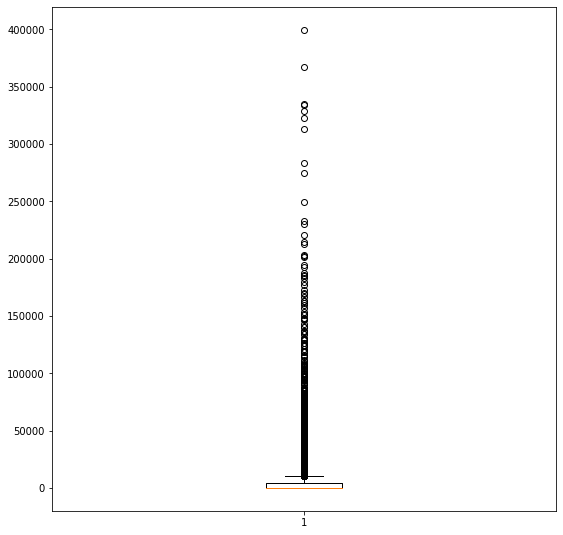

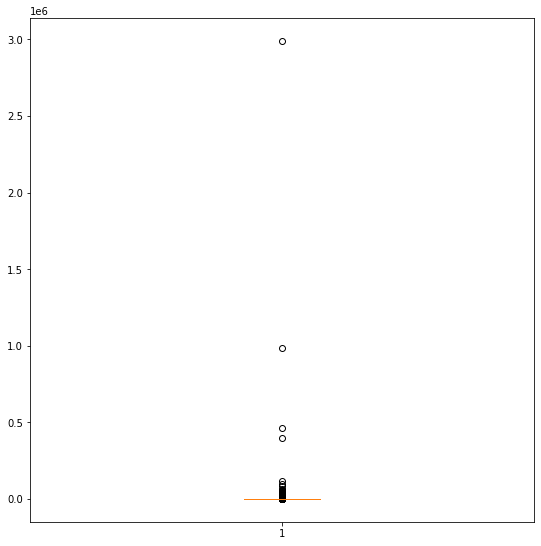

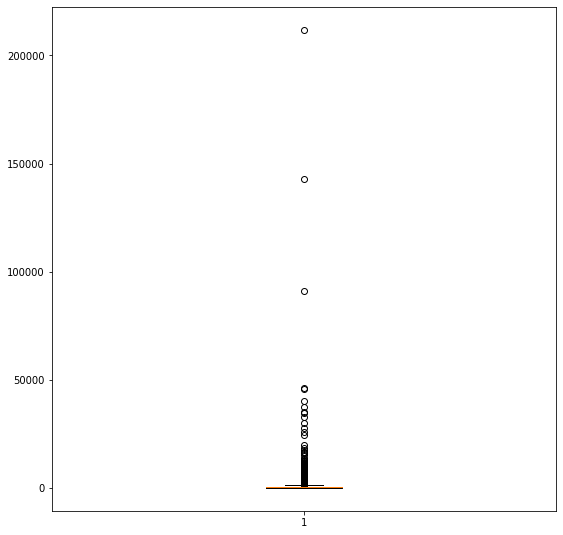

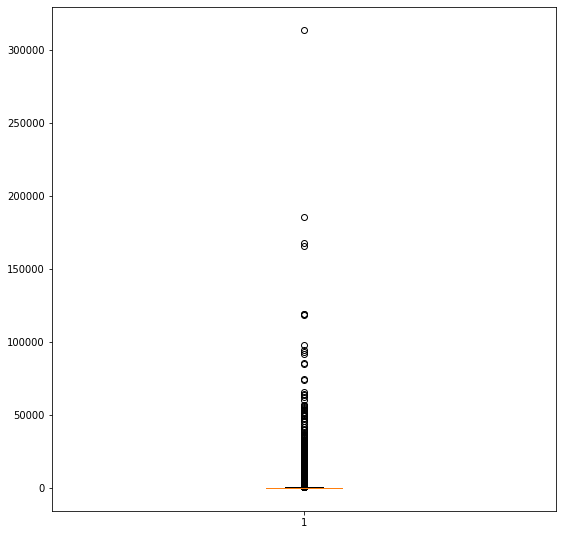

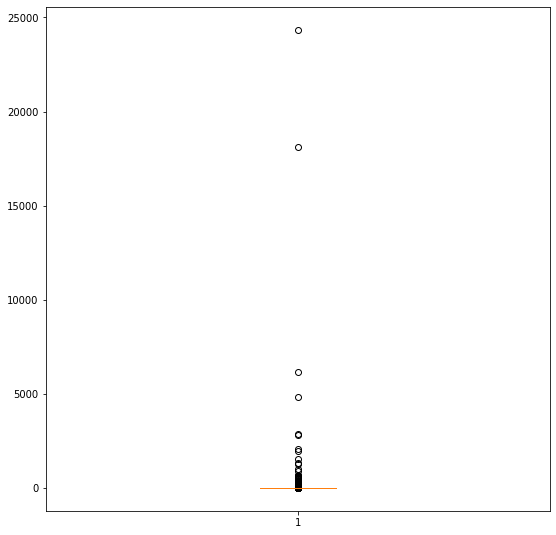

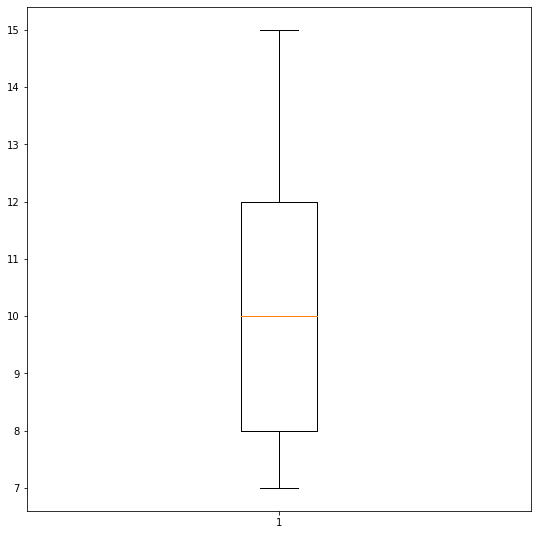

In [43]:
list = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'age']
for i in list:
    fig = plt.figure(figsize =(7, 7)) 
    # Creating axes instance 
    ax = fig.add_axes([1, 1, 1, 1]) 
    #change of origin by adding 1 to the original data 
    ax.boxplot(df_model[i] + 1 )
        


<AxesSubplot:xlabel='friends_count', ylabel='Count'>

<AxesSubplot:xlabel='age', ylabel='Count'>

<AxesSubplot:xlabel='followers_count', ylabel='Count'>

<AxesSubplot:xlabel='statuses_count', ylabel='Count'>

<AxesSubplot:xlabel='listed_count', ylabel='Count'>

<AxesSubplot:xlabel='favourites_count', ylabel='Count'>

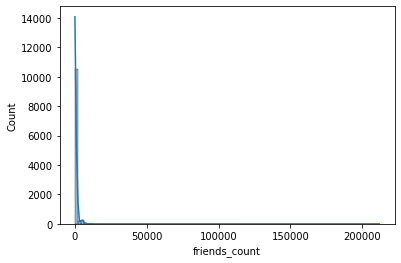

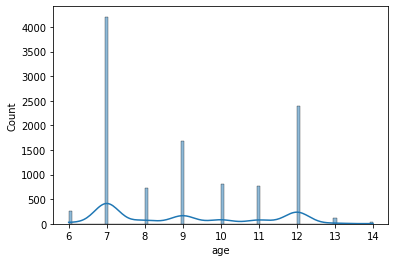

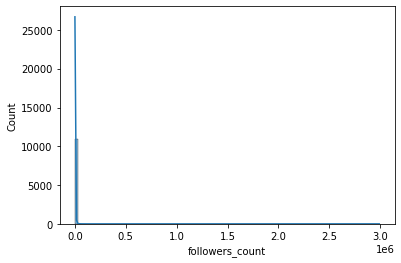

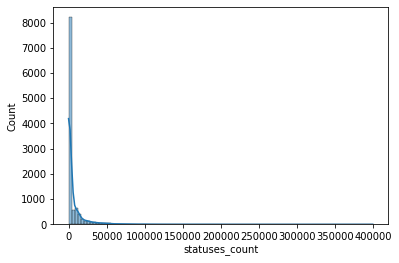

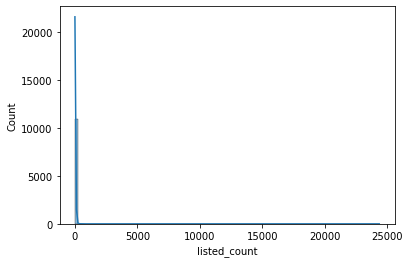

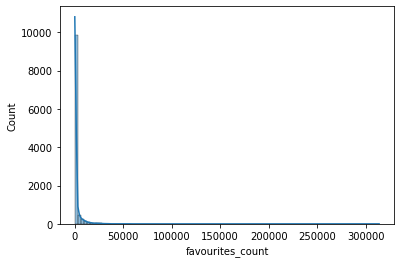

In [45]:
list = {'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'age'}
for i in list:
    fig, ax = plt.subplots(1)
    sns.histplot(df_model[i], bins = 100, log_scale= False, kde = True)
    #np.log(df[i]+1).plot.hist(bins = 100)


<AxesSubplot:xlabel='friends_count', ylabel='Count'>

<AxesSubplot:xlabel='age', ylabel='Count'>

<AxesSubplot:xlabel='followers_count', ylabel='Count'>

<AxesSubplot:xlabel='statuses_count', ylabel='Count'>

<AxesSubplot:xlabel='listed_count', ylabel='Count'>

<AxesSubplot:xlabel='favourites_count', ylabel='Count'>

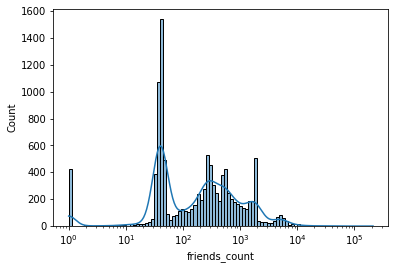

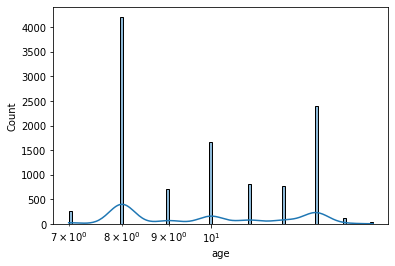

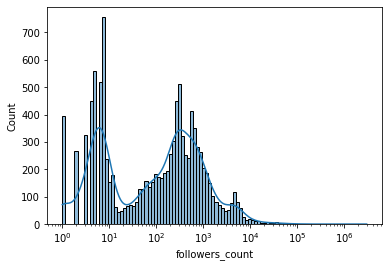

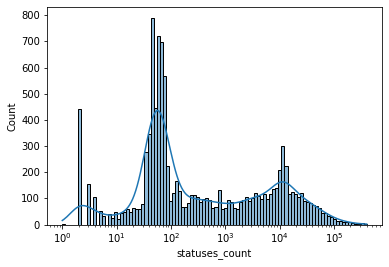

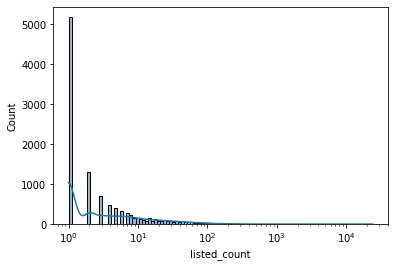

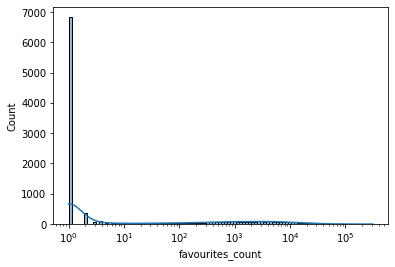

In [44]:
list = {'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'age'}
for i in list:
    fig, ax = plt.subplots(1)
    sns.histplot(df_model[i]+1, bins = 100, log_scale= True, kde = True)
    #np.log(df[i]+1).plot.hist(bins = 100)


#look for details
crim_boxcox = stats.boxcox(df['statuses_count']+1)[0]

In [46]:
pd.crosstab(df['verified'], df['protected'])

protected,1.0,0
verified,,
1.0,0,11
0,78,10928


In [47]:
pd.crosstab(df['default_profile'], df['protected'])

protected,1.0,0
default_profile,,
1.0,22,1455
0,56,9484


In [48]:
pd.crosstab(df['default_profile'], df['protected'])

protected,1.0,0
default_profile,,
1.0,22,1455
0,56,9484


In [ ]:
# not working with crosstab to assess the suitability of variables
#pd.crosstab(df['default_profile'], df['default_profile_image'])

In [49]:
pd.crosstab(df['class'], df['verified'])

verified,1.0,0
class,,
0,11,3463
1,0,7543


In [50]:
pd.crosstab(df['class'], df['protected'], margins = True)

protected,1.0,0,All
class,,,
0,78,3396,3474
1,0,7543,7543
All,78,10939,11017


In [51]:
pd.crosstab(df['protected'], df['verified'], margins = True)

verified,1.0,0,All
protected,,,
1.0,0,78,78
0,11,10928,10939
All,11,11006,11017


In [52]:
pd.crosstab(df['verified'], df['class'], margins = True)

class,0,1,All
verified,,,
1.0,11,0,11
0,3463,7543,11006
All,3474,7543,11017


(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:xlabel='class', ylabel='verified-protected-default_profile-profile_use_background_image-description_present-geo_enabled-url_present'>

class                                                                                                          0  \
verified protected default_profile profile_use_background_image description_present geo_enabled url_present        
1.0      0         1.0             1.0                          1                   1.0         1              1   
                   0               1.0                          1                   1.0         0              1   
                                                                                                1              5   
                                                                                    0           1              3   
                                   0                            1                   1.0         1              1   
0        1.0       1.0             1.0                          0                   1.0         0              3   
                                                                                    0           0              4   
                                                                1                   1.0         0              6   
                                                                                    0           0              5   
                                                                                                1              4   
                   0               1.0                          0                   1.0         0              4   
                                                                                                1              1   
                                                                                    0           0              2   
                                                                1                   1.0         0             15   
                                                                                                1             15   
                                                                                    0           0              6   
                                                                                                1              3   
                                   0                            0                   0           0              2   
                                                                1                   1.0         0              2   
                                                                                                1              1   
                                                                                    0           0              4   
                                                                                                1              1   
         0         1.0             1.0                          0                   1.0         0             66   
                                                                                                1             12   
                                                                                    0           0            106   
                                                                                                1              5   
                                                                1                   1.0         0            344   
                                                                                                1            122   
                                                                                    0           0            294   
                                                                                                1             60   
                   0               1.0                          0                   1.0         0             66   
                                                                                                1             16   
                                                        

<Figure size 432x288 with 0 Axes>

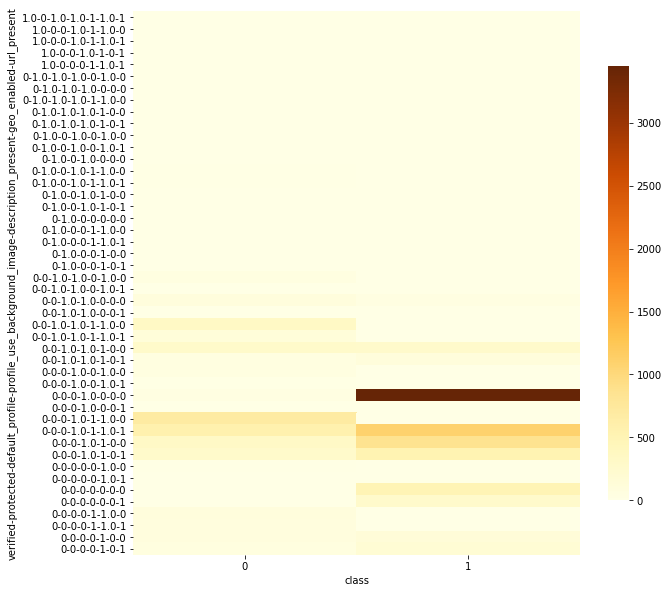

In [57]:
plt.clf()
cross = pd.crosstab(index = [df_model['verified'], df_model['protected'], df_model['default_profile'], df_model['profile_use_background_image'], df_model['description_present'], df_model['geo_enabled'], df_model['url_present']], columns = df['class'])
plt.subplots(figsize=(10,10))
plt.tick_params(labelsize = 10)
sns.heatmap(cross, cmap = 'YlOrBr', cbar_kws = {'shrink': 0.8})
cross

In [56]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   screen_name                   11017 non-null  object
 1   statuses_count                11017 non-null  int64 
 2   followers_count               11017 non-null  int64 
 3   friends_count                 11017 non-null  int64 
 4   favourites_count              11017 non-null  int64 
 5   listed_count                  11017 non-null  int64 
 6   url_present                   11017 non-null  object
 7   default_profile               11017 non-null  object
 8   geo_enabled                   11017 non-null  object
 9   profile_use_background_image  11017 non-null  object
 10  description_present           11017 non-null  object
 11  verified                      11017 non-null  object
 12  protected                     11017 non-null  object
 13  class           

In [59]:
df_pairplot = df[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'class']]

In [60]:
df_pairplot['statuses_count'] = np.log(df_pairplot['statuses_count']+1)
df_pairplot['followers_count'] = np.log(df_pairplot['followers_count']+1)
df_pairplot['friends_count'] = np.log(df_pairplot['friends_count']+1)
df_pairplot['favourites_count'] = np.log(df_pairplot['favourites_count']+1)
df_pairplot['listed_count'] = np.log(df_pairplot['listed_count']+1)

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-60-ca01b3625c75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pairplot['statuses_count'] = np.log(df_pairplot['statuses_count']+1)
<ipython-input-60-ca01b3625c75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pairplot['followers_count'] = np.log(df_pairplot['followers_count']+1)
<ipython-input-60-

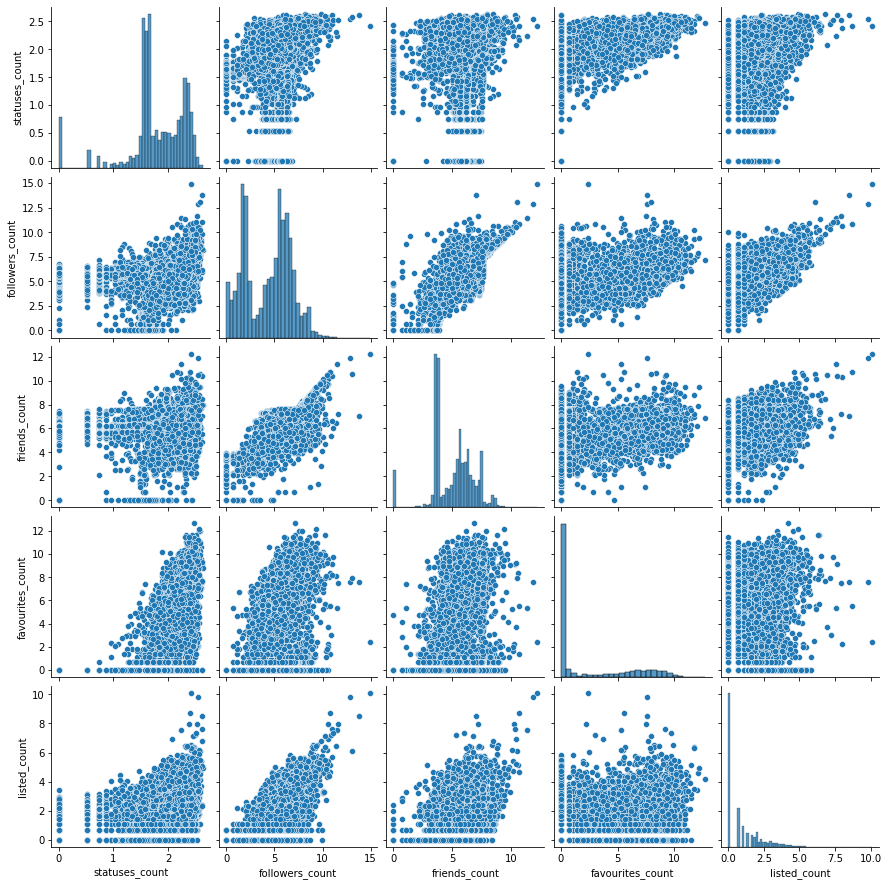

In [61]:
sns.pairplot(df_pairplot)

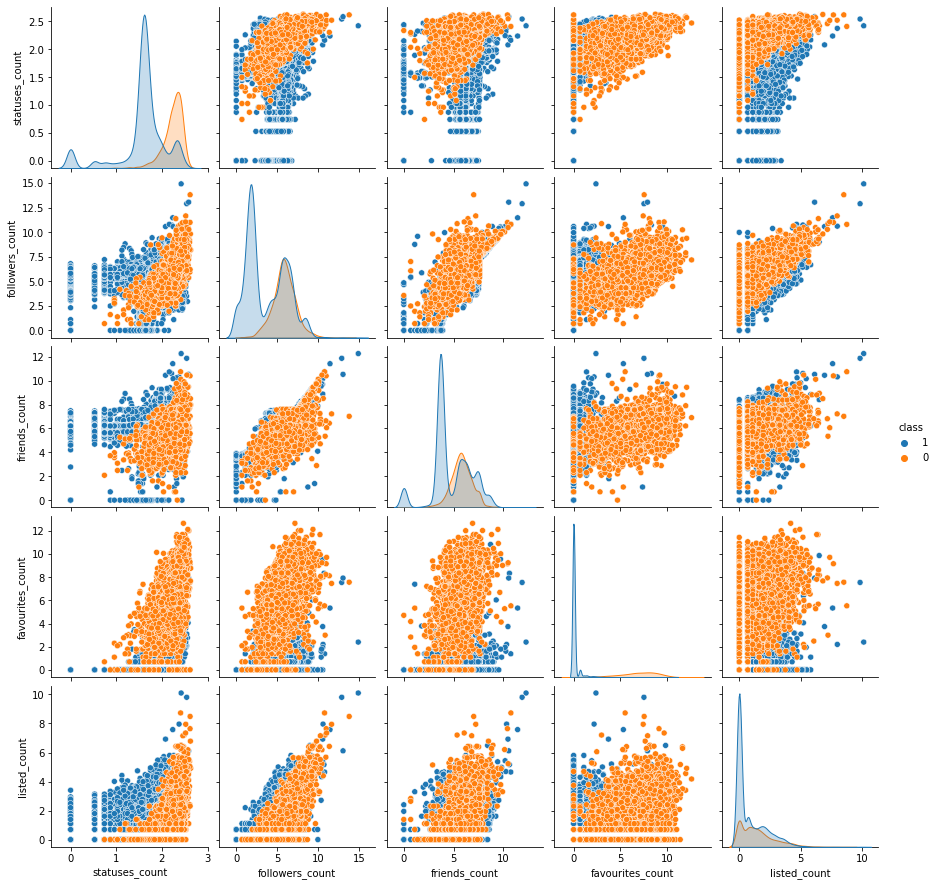

In [62]:
sns.pairplot(df_pairplot, hue = 'class')

Text(0.5, 0, 'X Label')

Text(0.5, 0, 'Y Label')

Text(0.5, 0, 'Z Label')

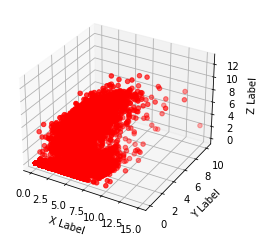

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log(df['followers_count']+1), np.log(df['listed_count']+1), np.log(df['favourites_count']+1), c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
# 3D plot
fig = px.scatter_3d(df, x=np.log(df['statuses_count']+1), y=np.log(df['followers_count']+1), z=np.log(df['listed_count']+1),color=df['Category'],labels= True)
fig.show()

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log



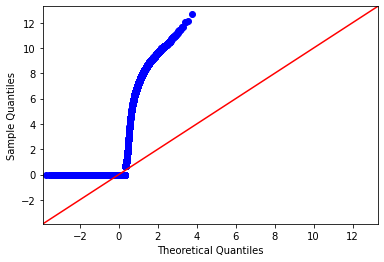

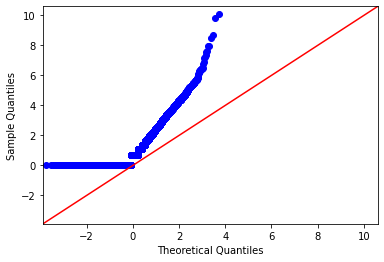

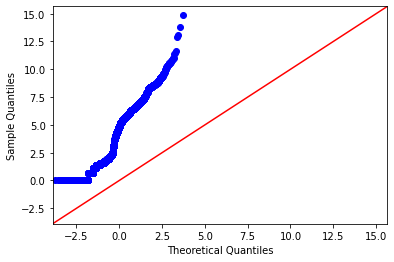

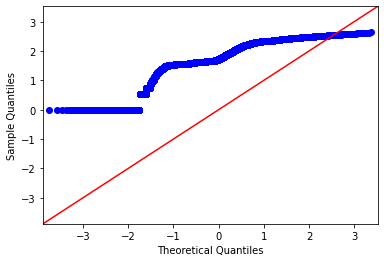

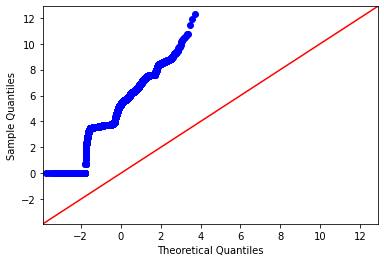

In [67]:
fig_5 = stm.qqplot(np.log(df['favourites_count']+1), line = '45')
fig_4 = stm.qqplot(np.log(df['listed_count']+1), line = '45')
fig_3 = stm.qqplot(np.log(df['followers_count']+1), line = '45')
fig_2 = stm.qqplot(np.log(df['statuses_count']+1), line = '45')
fig_1 = stm.qqplot(np.log(df['friends_count']+1), line = '45')
plt.show()

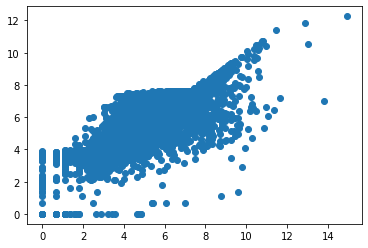

In [68]:
plt.scatter(np.log(df['followers_count']+1), np.log(df['friends_count']+1))

#### Use Hypothesis testing to asses if there is any significant difference between the data used to plot the above graph.


#### Hypothesis Testing and significance of Variable

In [ ]:
# Since we are using training data to set variables, we may not find the variable highly effective in the testing set.

## Work on this section required

#### Feature Creation using Color Schemes.

0000FF    3499
C0DEED    1837
253956    1125
131516     496
000000     427
          ... 
1F3642       1
020305       1
EFF4F7       1
61E8CB       1
0CF270       1
Name: profile_background_color, Length: 532, dtype: int64

others    4758
0000FF    3499
C0DEED    1837
131516     496
000000     427
Name: background_color_class, dtype: int64

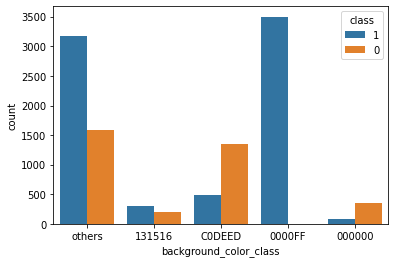

In [81]:
# manipulating color_codes of the text to create the feature assiciated with background text color. 
df['profile_background_color'].value_counts()

df.loc[df["profile_background_color"] == '0000FF', "background_color_class"] = "0000FF"
df.loc[df["profile_background_color"] == 'C0DEED', "background_color_class"] = "C0DEED"
df.loc[df["profile_background_color"] == '131516', "background_color_class"] = "131516"
df.loc[df["profile_background_color"] == '000000', "background_color_class"] = "000000"
df.loc[df['background_color_class'].isnull(), 'background_color_class'] = "others"
df['background_color_class'].value_counts()
fig_1 = sns.countplot(x = 'background_color_class', data = df, hue = 'class')
#df.loc[np.logical_and(df["profile_background_color"] != '131516', df["profile_background_color"] != 'C0DEED',df["profile_background_color"] != '0000FF') , "background_color_class"] = "4"

In [82]:
df['profile_text_color'].value_counts()

333333    6992
0         1013
000000     517
666666     302
3D1957     215
          ... 
0084B4       1
AB03FF       1
FAECE1       1
1C1200       1
0C9DB0       1
Name: profile_text_color, Length: 406, dtype: int64

In [ ]:
### Need to change variable encoding for 0  and 000000, since 0 represents missing value and is category in itself

In [73]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["profile_text_color"] == '333333', "text_color_class"] = "333333"
df.loc[np.logical_or(df["profile_text_color"] == '0',df["profile_text_color"] == '000000') , "text_color_class"] = "000000"
df.loc[df["profile_text_color"] == '3D1957', "text_color_class"] = "3"
#df.loc[np.logical_and(df["profile_background_color"] != '131516', df["profile_background_color"] != 'C0DEED',df["profile_background_color"] != '0000FF') , "background_color_class"] = "4"

333333    6992
other     2280
000000    1530
3          215
Name: text_color_class, dtype: int64

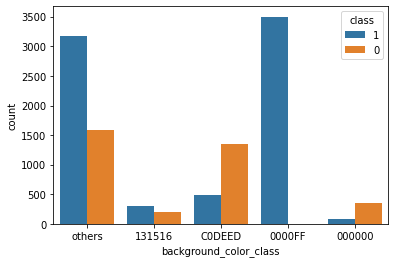

In [74]:
df['text_color_class'] = df['text_color_class'].fillna("other")
df['text_color_class'].value_counts()
fig_1 = sns.countplot(x = 'background_color_class', data = df, hue = 'class')

In [75]:
df_model['text_color_class'] = df['text_color_class']

<ipython-input-75-039978c986db>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
print(df['profile_sidebar_fill_color'].value_counts())

DDEEF6    5896
407DB0    1012
EFEFEF     479
000000     380
252429     303
          ... 
9FD13A       1
6E6C45       1
3D3D3D       1
FFFAFA       1
3B615D       1
Name: profile_sidebar_fill_color, Length: 384, dtype: int64


In [77]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["profile_sidebar_fill_color"] == 'DDEEF6', "sidebar_color_class"] = "DDEEF6"
df.loc[np.logical_or(df["profile_sidebar_fill_color"] == '0',df["profile_sidebar_fill_color"] == '000000') , "sidebar_color_class"] = "000000"
df.loc[df["profile_sidebar_fill_color"] == '407DB0', "sidebar_color_class"] = "407DB0"
df.loc[df["profile_sidebar_fill_color"] == 'EFEFEF', "sidebar_color_class"] = "EFEFEF"
#df.loc[np.logical_and(df["profile_background_color"] != '131516', df["profile_background_color"] != 'C0DEED',df["profile_background_color"] != '0000FF') , "background_color_class"] = "4"

In [80]:
df['sidebar_color_class'] = df['sidebar_color_class'].fillna('others')
#fig_1 = sns.countplot(x = 'sidebar_color_class', data = df, hue = 'class')

In [79]:
df_model['sidebar_color_class'] = df['sidebar_color_class']

<ipython-input-79-4b0baa6aef06>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### testing for hypothesis that newly created variables have significant impact on the class

In [ ]:
# https://towardsdatascience.com/how-to-test-for-statistically-significant-relationships-between-categorical-variables-with-chi-66c3ebeda7cc

In [ ]:
### create column with value count of class for the pivot table

In [ ]:
df_model['protected'] = df_1['protected']

In [ ]:
pivot_df = pd.crosstab(index = df_model['protected'], columns = df_model['class'])

###### Hypothesis: variables 'protected and class are independent'

In [ ]:
chi2, p, dof, ex = chi2_contingency(pivot_df, correction=False)
print(chi2, '{:.10f}'.format(p))

###### Hypothesis: variables 'background_color_class and class are independent'

In [ ]:
pivot_df = pd.crosstab(index = df_model['background_color_class'], columns = df_model['class'])

chi2, p, dof, ex = chi2_contingency(pivot_df, correction=True)
print(pivot_df)
print(chi2, '{:.10f}'.format(p))

###  Variable Encoding for Categorical Variables and Creates features

In [ ]:
### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
df_model.info()

In [ ]:
# Label Encoding for nominal data 
gle = LabelEncoder()
s_color_labels = gle.fit_transform(df_model['sidebar_color_class'])
s_color_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
s_color_mappings

In [ ]:
df_model['s_color_labels'] = s_color_labels

In [ ]:
gen_ohe = OneHotEncoder()
s_color_f_arr = gen_ohe.fit_transform(
                              df_model[['s_color_labels']]).toarray()
feature_labels = list(gle.classes_)
gen_features = pd.DataFrame(s_color_f_arr, 
                            columns=feature_labels)

In [ ]:
gen_features.head()

In [ ]:
df_model.shape

In [ ]:
df_model_1 = pd.concat([df_model.reset_index(drop=True), gen_features], axis = 1)

In [ ]:
df_model_1.info()

In [ ]:
df_model_1.drop(labels = ['s_color_labels', 'sidebar_color_class', 'text_color_class', 'background_color_class'],axis = 1, inplace = True)

### Exploratory Data Analysis on raw data for feature selection and data development

### Logistics model Training and testing

In [83]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   screen_name                   11017 non-null  object
 1   statuses_count                11017 non-null  int64 
 2   followers_count               11017 non-null  int64 
 3   friends_count                 11017 non-null  int64 
 4   favourites_count              11017 non-null  int64 
 5   listed_count                  11017 non-null  int64 
 6   url_present                   11017 non-null  object
 7   default_profile               11017 non-null  object
 8   geo_enabled                   11017 non-null  object
 9   profile_use_background_image  11017 non-null  object
 10  description_present           11017 non-null  object
 11  verified                      11017 non-null  object
 12  protected                     11017 non-null  object
 13  class           

In [87]:
df_model.drop(labels = ['background_color_class', 'text_color_class', 'sidebar_color_class'], axis = 1, inplace = True)

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
df_model_1 = df_model

In [138]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   screen_name                   11017 non-null  object 
 1   statuses_count                11017 non-null  int64  
 2   followers_count               11017 non-null  int64  
 3   friends_count                 11017 non-null  int64  
 4   favourites_count              11017 non-null  int64  
 5   listed_count                  11017 non-null  int64  
 6   url_present                   11017 non-null  float64
 7   default_profile               11017 non-null  object 
 8   geo_enabled                   11017 non-null  object 
 9   profile_use_background_image  11017 non-null  object 
 10  description_present           11017 non-null  object 
 11  verified                      11017 non-null  object 
 12  protected                     11017 non-null  object 
 13  c

In [139]:
df_model_1['url_present'] = df_model_1['url_present'].astype(float)
df_model_1['default_profile'] = df_model_1['default_profile'].astype(float)
df_model_1['geo_enabled'] = df_model_1['geo_enabled'].astype(float)
df_model_1['profile_use_background_image'] = df_model_1['profile_use_background_image'].astype(float)
df_model_1['description_present'] = df_model_1['description_present'].astype(float)
df_model_1['verified'] = df_model_1['verified'].astype(float)
df_model_1['protected'] = df_model_1['protected'].astype(float)
df_model_1['class'] = df_model_1['class'].astype(float)

<ipython-input-139-3a0ddf4a8caf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-3a0ddf4a8caf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-3a0ddf4a8caf>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-3a0

In [140]:
#features
X=df_model_1.drop(columns = ['class', 'screen_name'], axis =1)
#target variable
y=df_model_1[['class']].values

##### Training the model on raw data

In [141]:
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (7711, 13)
Number transactions y_train dataset:  (7711, 1)
Number transactions X_test dataset:  (3306, 13)
Number transactions y_test dataset:  (3306, 1)


In [142]:
# train the model on train set
lr1 = LogisticRegression() 
fit_model = lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

         0.0       0.95      0.68      0.80      1095
         1.0       0.86      0.98      0.92      2211

    accuracy                           0.88      3306
   macro avg       0.91      0.83      0.86      3306
weighted avg       0.89      0.88      0.88      3306



/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



##### Using Oversampling technique to increase the label count for training data

In [92]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': [0]
Before OverSampling, counts of label '0': [0] 

After OverSampling, the shape of train_X: (10664, 13)
After OverSampling, the shape of train_y: (10664,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


In [93]:
# train the model on train set
lr1 = LogisticRegression() 
fit_model = lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test) 


# print classification report 
print(classification_report(y_test, predictions)) 

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1095
           1       0.93      0.95      0.94      2211

    accuracy                           0.92      3306
   macro avg       0.92      0.91      0.91      3306
weighted avg       0.92      0.92      0.92      3306



##### Undersampling to assess the model accuracy when less data is present 

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel()) 

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

In [ ]:
# train the model on train set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss) 
predictions = lr2.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

##### Fitting the model on log transformed data (variables with large range) and checking if it improves the accuracies

In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   statuses_count                11017 non-null  int64 
 1   followers_count               11017 non-null  int64 
 2   friends_count                 11017 non-null  int64 
 3   favourites_count              11017 non-null  int64 
 4   listed_count                  11017 non-null  int64 
 5   url_present                   11017 non-null  object
 6   default_profile               11017 non-null  object
 7   geo_enabled                   11017 non-null  object
 8   profile_use_background_image  11017 non-null  object
 9   description_present           11017 non-null  object
 10  verified                      11017 non-null  object
 11  protected                     11017 non-null  object
 12  age                           11017 non-null  int64 
dtypes: int64(6), obj

In [95]:
# log transformation of variables with large values for better fitting of model.

X = (pd.DataFrame([np.log(X['statuses_count']+1), np.log(X['followers_count']+1), np.log(X['friends_count']+1), np.log(X['favourites_count']+1), np.log(X['listed_count']+1), X['default_profile'], X['geo_enabled'], X['verified'], X['protected'], X['profile_use_background_image'], X['url_present'], X['description_present'], X['age']]))
X = np.transpose(X)


In [96]:
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (7711, 13)
Number transactions y_train dataset:  (7711, 1)
Number transactions X_test dataset:  (3306, 13)
Number transactions y_test dataset:  (3306, 1)


In [97]:
# train the model on train set
lr1 = LogisticRegression() 
fit_model = lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1095
           1       0.98      0.99      0.98      2211

    accuracy                           0.98      3306
   macro avg       0.98      0.97      0.97      3306
weighted avg       0.98      0.98      0.98      3306



#### Using statsmodel package to fit the model

In [ ]:
# https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

In [115]:
type(X_train)

pandas.core.frame.DataFrame

In [134]:
X_train.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url_present,default_profile,geo_enabled,profile_use_background_image,description_present,verified,protected,age
1939,214,578,538,0,15,1,0,1.00000,1.00000,1,0,0,12
8243,2754,237,439,7269,1,0,0,1.00000,0,1,0,0,9
2284,533,373,281,0,44,1,0,1.00000,1.00000,1,0,0,12
9118,140388,293,289,8574,6,1,0,0,1.00000,1,0,0,11
3277,123,0,0,0,0,0,0,0,1.00000,1,0,0,9


In [145]:
log_reg = stm.Logit(y_train, X_train).fit()
print(log_reg.summary())

         Current function value: 0.264144
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7711
Model:                          Logit   Df Residuals:                     7698
Method:                           MLE   Df Model:                           12
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                  0.5725
Time:                        22:47:45   Log-Likelihood:                -2036.8
converged:                      False   LL-Null:                       -4764.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
statuses_count                -2.91e-05   3.64e-06     -7.992      0.000   -3.62e-05    -2.2e-05
followers_c

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [147]:
log_reg_1 = stm.GLM(y_train, X_train).fit()
print(log_reg_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7711
Model:                            GLM   Df Residuals:                     7698
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.12439
Method:                          IRLS   Log-Likelihood:                -2898.8
Date:                Wed, 31 Mar 2021   Deviance:                       957.56
Time:                        22:48:40   Pearson chi2:                     958.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
statuses_count  

RFE

In [155]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7711 entries, 1939 to 2732
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   statuses_count                7711 non-null   int64  
 1   followers_count               7711 non-null   int64  
 2   friends_count                 7711 non-null   int64  
 3   favourites_count              7711 non-null   int64  
 4   listed_count                  7711 non-null   int64  
 5   url_present                   7711 non-null   float64
 6   default_profile               7711 non-null   float64
 7   geo_enabled                   7711 non-null   float64
 8   profile_use_background_image  7711 non-null   float64
 9   description_present           7711 non-null   float64
 10  verified                      7711 non-null   float64
 11  protected                     7711 non-null   float64
 12  age                           7711 non-null   int64  
dtype

#### RFE For the top features

In [154]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 1)

rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/lenov

[False False False False False False False False False False False  True
 False]
[13 12 11  9 10  6  3  2  7  5  4  1  8]


/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [189]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5, bootstrap=True)
model = rf.fit(X_train, y_train)


<ipython-input-189-e6cb0b94d823>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [190]:
# Use the forest's predict method on the test data
predictions = model.predict(X_test)

In [171]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [191]:
roc_auc_score(y_test, predictions)

0.9774427984609952

In [192]:
confusion_matrix(y_test, predictions)

array([[1056,   39],
       [  21, 2190]])

In [178]:
from sklearn.model_selection import cross_val_score

In [194]:
cross_val_score(rf, X, y, cv = 6, scoring='roc_auc')

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

array([0.99200145, 0.98524189, 0.99084711, 0.99920583, 0.99848311,
       0.99350511])

In [199]:
model.feature_importances_

array([1.91080096e-01, 5.48650034e-02, 6.50659874e-02, 4.96845381e-01,
       1.06175024e-02, 1.64157814e-02, 2.55249153e-02, 8.44463561e-02,
       5.13181225e-03, 1.99253468e-02, 7.55573312e-05, 1.12962184e-03,
       2.88766381e-02])

#### Binomial Family Model with Default Link Function

In [105]:
bin_model = stm.GLM(y_train, X_train, family = stm.families.Binomial())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
gamma_results = gamma_model.fit()

In [ ]:
print(gamma_results.summary())

In [ ]:
gamma_model = stm.GLM(y_train, X_train_3, family = stm.families.Binomial())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

In [ ]:
X_train_3.info()
X_train_4.info()

In [ ]:
gamma_model = stm.GLM(y_train, X_train_4, family = stm.families.Binomial())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

In [ ]:
gamma_model = stm.GLM(y_train, X_train_5, family = stm.families.Binomial())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

In [ ]:
gamma_model = stm.GLM(y_train, X_train, family = stm.families.Binomial())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
predictors = X_train
selector = RFE(lr1, n_features_to_select= 1)
selector = selector.fit(predictors, y_train)

In [ ]:
order = selector.ranking_
order

In [ ]:
X_train.info()

In [ ]:
feature_ranks = []
for i in order:
    feature_ranks.append(f"{i}.{X_train.columns[i-1]}")

In [ ]:
feature_ranks

In [ ]:
df.head()

In [ ]:
X_train_6 = X_train[['statuses_count', 'followers_count','friends_count', 'favourites_count', 'default_profile', 'geo_enabled', 'listed_count', 'protected', 'verified']]
gamma_model = stm.GLM.from_formula("class ~ statuses_count", family = stm.families.Binomial(), data = df)
gamma_results = gamma_model.fit()
print(gamma_results.summary())


In [ ]:
X_train_6 = X_train[['statuses_count', 'followers_count','friends_count', 'favourites_count', 'listed_count', 'default_profile', 'geo_enabled']]
gamma_model = stm.GLM(y_train, X_train_6, family = stm.families.Binomial())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

In [ ]:
X_train_6 = X_train[['statuses_count', 'followers_count','friends_count', 'favourites_count', 'default_profile', 'geo_enabled', 'listed_count', 'protected', 'verified']]
gamma_model = stm.GLM(y_train, X_train_6, family = stm.families.Binomial())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#### Hosmer Lemeshow Test Function 

In [ ]:
def hl_test(data, g):
    '''
    Hosmer-Lemeshow test to judge the goodness of fit for binary data

    Input: dataframe(data), integer(num of subgroups divided)
    
    Output: float
    '''
    data_st = data.sort_values('prob')
    data_st['dcl'] = pd.qcut(data_st['prob'], g)
    
    ys = data_st['ViolentCrimesPerPop'].groupby(data_st.dcl).sum()
    yt = data_st['ViolentCrimesPerPop'].groupby(data_st.dcl).count()
    yn = yt - ys
    
    yps = data_st['prob'].groupby(data_st.dcl).sum()
    ypt = data_st['prob'].groupby(data_st.dcl).count()
    ypn = ypt - yps
    
    hltest = ( ((ys - yps)**2 / yps) + ((yn - ypn)**2 / ypn) ).sum()
    pval = 1 - chi2.cdf(hltest, g-2)
    
    df = g-2
    
    print('\n HL-chi2({}): {}, p-value: {}\n'.format(df, hltest, pval))